In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,_),(X_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
x = np.concatenate([X_train,X_test],axis=0)
x = x.astype('float32')/ 255.0
x_flat = x.reshape((x.shape[0],-1))

In [9]:
x_flat.shape

(70000, 784)

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components = 4)
latent_pca = pca.fit_transform(x_flat)

In [14]:
pca_plt = TSNE(n_components = 2,random_state=42)
latent_tsne = pca_plt.fit_transform(latent_pca)

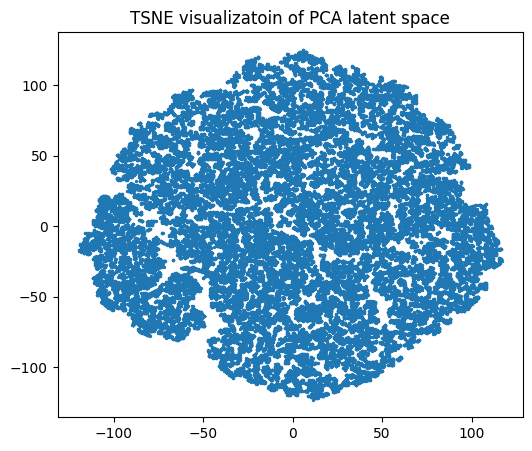

In [15]:
plt.figure(figsize=(6,5))
plt.scatter(latent_tsne[:,0],latent_tsne[:,1],s=2)
plt.title("TSNE visualizatoin of PCA latent space")
plt.show()

In [16]:
reconstructed_pca = pca.inverse_transform(latent_pca[:20])
reconstructed_pca = reconstructed_pca.reshape(-1,28,28)

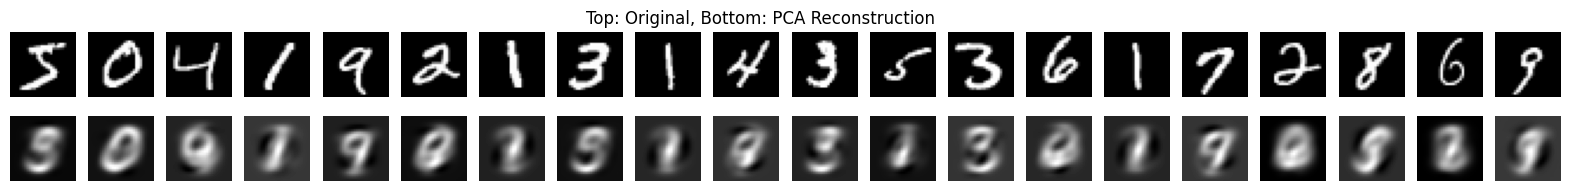

In [18]:
fig, axes = plt.subplots(2, 20, figsize=(20,2))
for i in range(20):
    axes[0, i].imshow(x[i], cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed_pca[i], cmap='gray')
    axes[1, i].axis('off')
plt.suptitle("Top: Original, Bottom: PCA Reconstruction")
plt.show()

In [19]:
print("Compression rate = ",784/4)

Compression rate =  196.0


In [21]:
import tensorflow as tf
from tensorflow.keras import layers,models

input_image = tf.keras.Input(shape =(784,))
encoded = layers.Dense(128,activation = 'relu')(input_image)
encoded = layers.Dense(64 , activation='relu')(encoded)
latent = layers.Dense(4,activation='relu',name='latent')(encoded)

decoded = layers.Dense(64,activation = 'relu')(latent)
decoded = layers.Dense(128,activation='relu')(decoded)
decoded = layers.Dense(784,activation='relu')(decoded)

autoencoder = models.Model(input_image,decoded)
autoencoder.compile(loss='mse',optimizer='adam')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,772 (854.58 KB)

 Trainable params: 218,772 (854.58 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
autoencoder.fit(x_flat,x_flat,epochs=20,batch_size=256,shuffle=True,validation_split=0.1)


Epoch 1/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0704 - val_loss: 0.0496
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0471 - val_loss: 0.0416
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0401 - val_loss: 0.0371
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0370 - val_loss: 0.0354
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0353 - val_loss: 0.0343
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0342 - val_loss: 0.0332
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0333 - val_loss: 0.0325
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0326 - val_loss: 0.0322
Epoch 9/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0322 - val_loss: 0.0317
Epoch 10/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0316 - val_loss: 0.0312
Epoch 11/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0313 - val_loss: 0.0311
Epoch 12/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

In [25]:
encoder = models.Model(input_image,latent)
latent_ae = encoder.predict(x_flat)

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


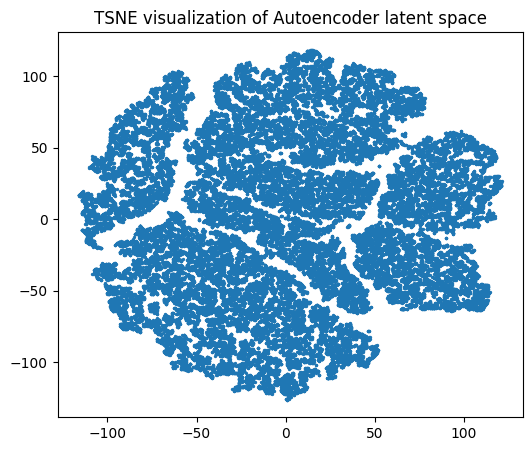

In [26]:
tsne_ae = TSNE(n_components=2, random_state=42)
latent_tsne_ae = tsne_ae.fit_transform(latent_ae)
plt.figure(figsize=(6,5))
plt.scatter(latent_tsne_ae[:,0], latent_tsne_ae[:,1], s=2)
plt.title("TSNE visualization of Autoencoder latent space")
plt.show()

In [27]:
reconstructed_ae = autoencoder.predict(x_flat[:20])
reconstructed_ae = reconstructed_ae.reshape(-1, 28, 28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


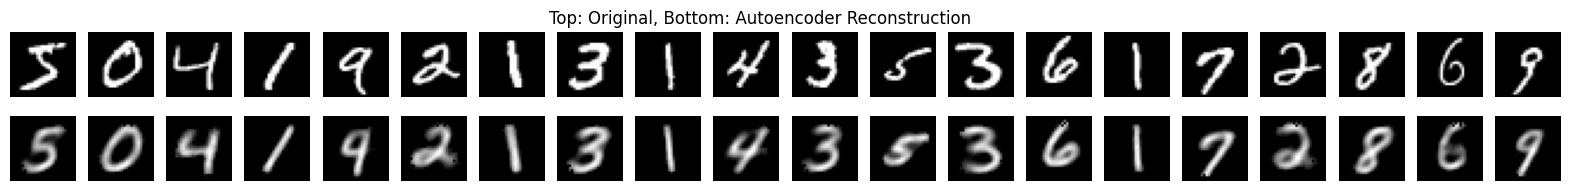

In [28]:
fig, axes = plt.subplots(2, 20, figsize=(20,2))
for i in range(20):
    axes[0, i].imshow(x[i], cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed_ae[i], cmap='gray')
    axes[1, i].axis('off')
plt.suptitle("Top: Original, Bottom: Autoencoder Reconstruction")
plt.show()


In [29]:
print("Compression ratio (Autoencoder):", 784/4)  # The latent vector size is 4, so ~196:1

Compression ratio (Autoencoder): 196.0


## Question 2

Treat one class as normal , any deviation from that normal pattern is anamoly, so in melanoma/non-melanoma detaset , non-melanoma images are normal beause they are far more common,so melanoma cases are anamoles

- we shall train an auto encoder only on nonmelignant images, it will learn to reconstruct these images very well, when we feed melignant images error will be high , so by thresholding the reconstructoin error we can classify

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_csv = pd.read_csv('/kaggle/input/resnet-final/train.csv')
train_csv.head(5)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [3]:
train_csv['target'].unique()

array([0, 1])

In [4]:
train_csv['target'].value_counts()

target
0    32542
1      584
Name: count, dtype: int64

so we shall train the model on '0's and '1's become anamolys

In [5]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input ,Dense 
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from sklearn.metrics import classification_report

In [6]:
df_bengin = train_csv[train_csv['benign_malignant'] == 'benign']
df_malignant = train_csv[train_csv['benign_malignant'] == 'malignant']

In [7]:
df_malignant.count()

image_name                       584
patient_id                       584
sex                              584
age_approx                       584
anatom_site_general_challenge    575
diagnosis                        584
benign_malignant                 584
target                           584
dtype: int64

In [8]:
img_folder = '/kaggle/input/resnet-final/train/train'

In [9]:
def load_images_from_df(dataframe,folder,target_size=(64,64)):
    images = []
    for idx,row in dataframe.iterrows():
        img_path = os.path.join(folder,row['image_name']+'.jpg')
        try:
            img = load_img(img_path,target_size=target_size)
            img = img_to_array(img)/255.0
            images.append(img)
        except Exception as e:
            # print("error loading image")
            continue
    return np.array(images)

In [10]:
X_train = load_images_from_df(train_csv,img_folder)

In [11]:
X_train.shape

(32701, 64, 64, 3)

In [12]:
X_test_malignant = load_images_from_df(df_malignant,img_folder)
X_test = np.concatenate([X_train,X_test_malignant] ,axis = 0)
Y_test = np.concatenate([np.zeros(len(X_train)), np.ones(len(X_test_malignant))])

In [13]:
X_test.shape

(33282, 64, 64, 3)

In [14]:
Y_test.shape

(33282,)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

In [16]:
input_shape = (64, 64, 3)

In [17]:
# Defining Model

input_img = Input(shape=(64,64,3))
flat = Flatten()(input_img)
encoded = Dense(1024,activation='relu')(flat)
encoded = Dense(512,activation = 'relu')(encoded)
encoded = Dense(256,activation = 'relu')(encoded)
latent = Dense(64,activation='relu',name='latent')(encoded)

decoded = Dense(265,activation='relu')(latent)
decoded = Dense(512,activation='relu')(decoded)
decoded = Dense(1024,activation='relu')(decoded)
decoded = Dense(np.prod(input_shape),activation='sigmoid')(decoded)
decoded = Reshape(input_shape)(decoded)

autoencoder_dense = Model(input_img,decoded)
autoencoder_dense.compile(optimizer = 'adam',loss='mse')
autoencoder_dense.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      12,583,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 265)                 │          17,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         136,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 12288)               │      12,595,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 64, 64, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,530,441 (101.21 MB)

 Trainable params: 26,530,441 (101.21 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history_dense = autoencoder_dense.fit(X_train,X_train,epochs=50,batch_size=32,validation_split=0.1)

Epoch 1/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0152 - val_loss: 0.0062
Epoch 2/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0061 - val_loss: 0.0047
Epoch 3/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 4/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 5/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 6/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 7/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 9/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 11/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 12/50
920/920 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/st

In [21]:
X_test_pred_dense = autoencoder_dense.predict(X_test)
reconstruction_errors_dense = np.mean(np.square(X_test - X_test_pred_dense),axis=(1,2,3))

X_train_pred_dense = autoencoder_dense.predict(X_train)
train_errors_dense = np.mean(np.square(X_train - X_train_pred_dense),axis=(1,2,3))
threshold_dense = np.mean(train_errors_dense) + 2 * np.std(train_errors_dense)
print("Reconstruction error threshold (Dense AE):", threshold_dense)

1041/1041 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reconstruction error threshold (Dense AE): 0.004344693035818636


                     precision    recall  f1-score   support

    Benign (Normal)       0.98      0.96      0.97     32701
Malignant (Anomaly)       0.07      0.16      0.10       581

           accuracy                           0.95     33282
          macro avg       0.53      0.56      0.53     33282
       weighted avg       0.97      0.95      0.96     33282



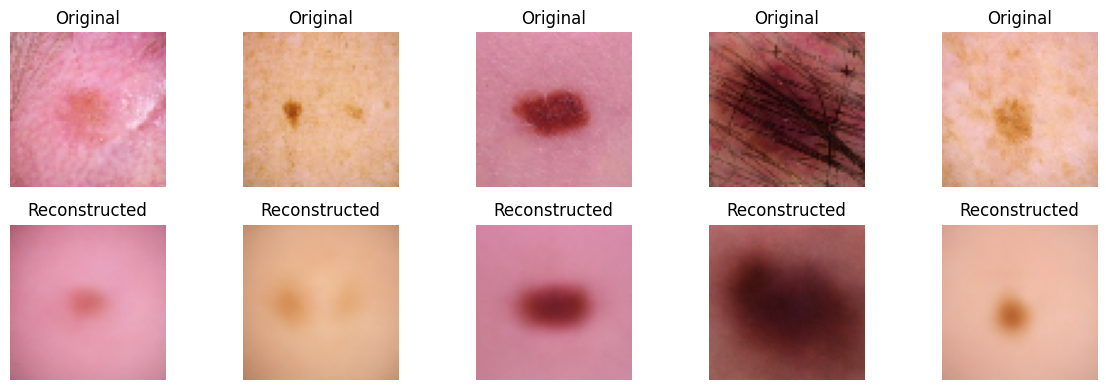

In [23]:
# Classify test samples: reconstruction error above threshold are considered anomalies (malignant)
y_pred_dense = (reconstruction_errors_dense > threshold_dense).astype(int)

# Assuming y_test contains labels (0 for benign, 1 for malignant)
print(classification_report(Y_test, y_pred_dense, target_names=["Benign (Normal)", "Malignant (Anomaly)"]))

# Visualize some reconstructions for qualitative assessment
n = 5  # display first 5 images from test set
plt.figure(figsize=(12, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')
    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_pred_dense[i])
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Question3

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - kl_loss: 2.1191 - loss: 237.9513 - reconstruction_loss: 235.8322 - val_kl_loss: 2.4191 - val_loss: 206.4378 - val_reconstruction_loss: 204.0187
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 2.3781 - loss: 217.8014 - reconstruction_loss: 215.4233 - val_kl_loss: 2.4725 - val_loss: 200.8335 - val_reconstruction_loss: 198.3610
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 2.3734 - loss: 214.1958 - reconstruction_loss: 211.8224 - val_kl_loss: 2.3897 - val_loss: 198.5684 - val_reconstruction_loss: 196.1787
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 2.3824 - loss: 212.5263 - reconstruction_loss: 210.1439 - val_kl_loss: 2.4477 - val_loss: 197.3161 - val_reconstruction_loss: 194.8684
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 2.3917 - loss: 211.5970 - reconstruction_loss: 209.2053 - val_kl_loss: 2.4368 - val_loss: 196.8684 - val_reconstruction_loss: 194.4316
Epoch 6/50

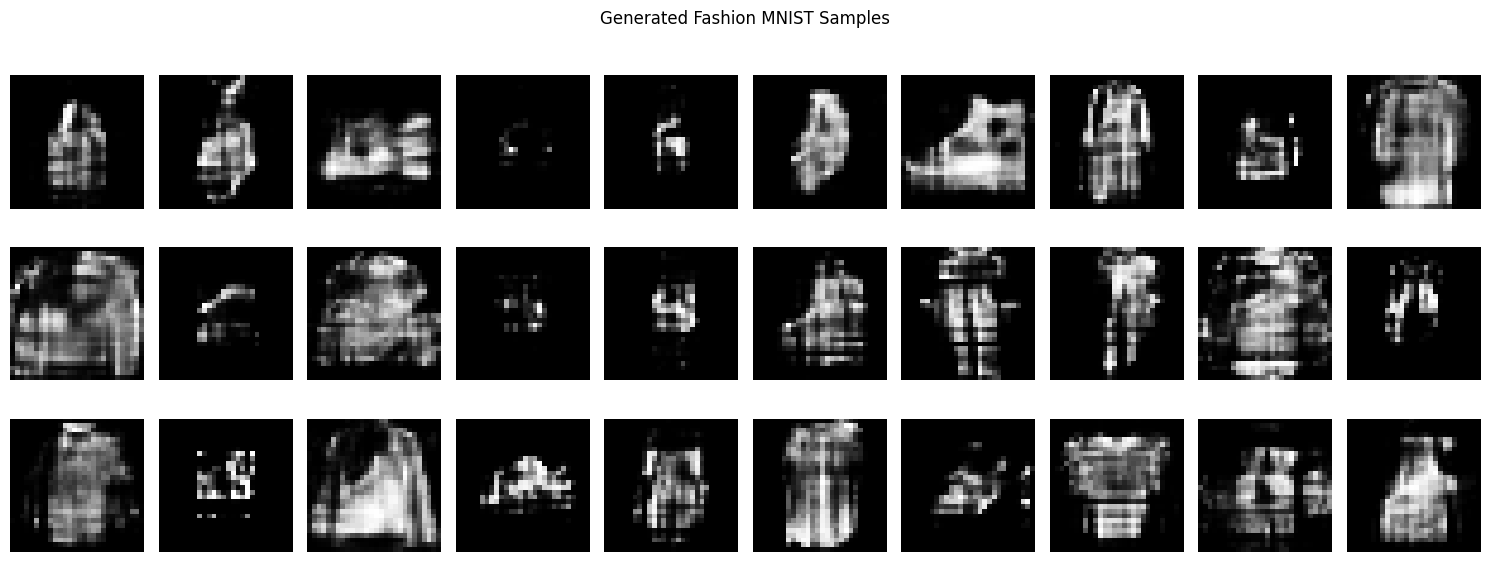

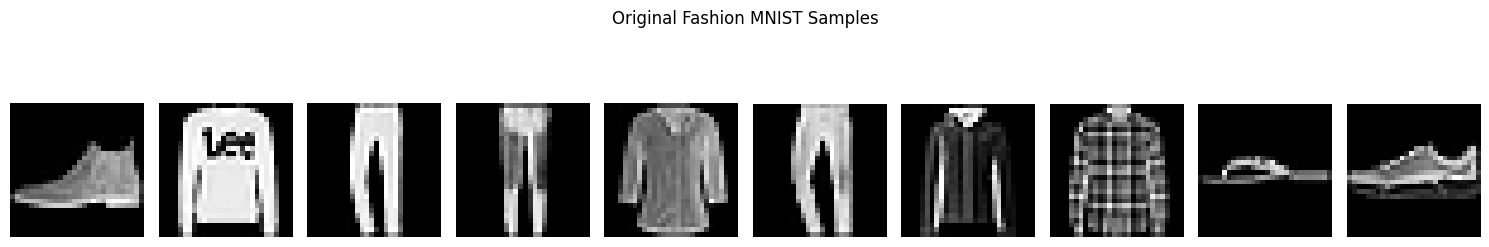

Fashion MNIST Categories: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


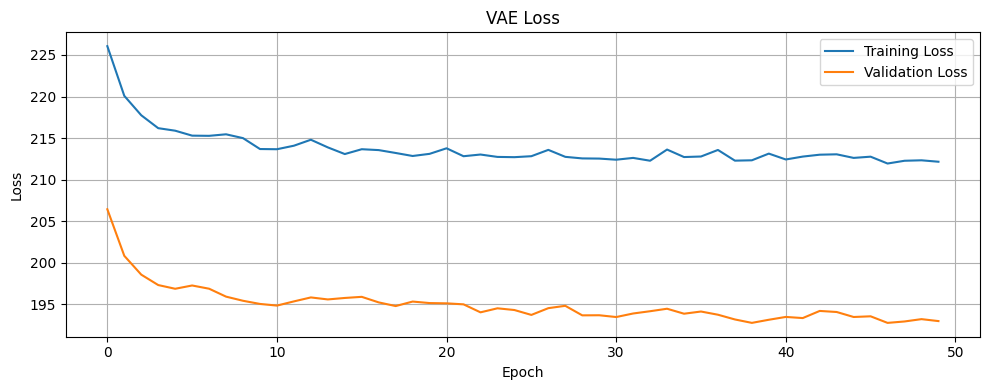

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras.models import Model

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Parameters
batch_size = 128
original_dim = 784  # 28*28
latent_dim = 64
intermediate_dim = 512
epochs = 50

# Custom sampling layer
class Sampling(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Define encoder model
class Encoder(Model):
    def __init__(self, latent_dim, intermediate_dim):
        super().__init__()
        self.dense1 = Dense(intermediate_dim, activation='relu')
        self.z_mean = Dense(latent_dim)
        self.z_log_var = Dense(latent_dim)
        self.sampling = Sampling()
        
    def call(self, inputs):
        x = self.dense1(inputs)
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        z = self.sampling([z_mean, z_log_var])
        return z_mean, z_log_var, z

# Define decoder model
class Decoder(Model):
    def __init__(self, original_dim, intermediate_dim):
        super().__init__()
        self.dense1 = Dense(intermediate_dim, activation='relu')
        self.dense2 = Dense(original_dim, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# Define VAE model
class VAE(Model):
    def __init__(self, original_dim, latent_dim, intermediate_dim):
        super().__init__()
        self.original_dim = original_dim
        self.encoder = Encoder(latent_dim, intermediate_dim)
        self.decoder = Decoder(original_dim, intermediate_dim)
        
    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        
        # KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        
        # Reconstruction loss (pixel-wise binary crossentropy)
        reconstruction_loss = tf.reduce_mean(
            self.original_dim * tf.keras.losses.binary_crossentropy(inputs, reconstructed)
        )
        
        # Total loss
        total_loss = reconstruction_loss + kl_loss
        
        # Add loss to the model
        self.add_loss(total_loss)
        
        return reconstructed
    
    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            
            # Compute losses
            reconstruction_loss = tf.reduce_mean(
                self.original_dim * tf.keras.losses.binary_crossentropy(data, reconstruction)
            )
            
            kl_loss = -0.5 * tf.reduce_mean(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            
            total_loss = reconstruction_loss + kl_loss
        
        # Get gradients and update weights
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }
    
    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        
        # Compute losses
        reconstruction_loss = tf.reduce_mean(
            self.original_dim * tf.keras.losses.binary_crossentropy(data, reconstruction)
        )
        
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        
        total_loss = reconstruction_loss + kl_loss
        
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }
    
    def encode(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return z

    def decode(self, z):
        return self.decoder(z)

# Create and compile the VAE model
vae = VAE(original_dim, latent_dim, intermediate_dim)
# vae.compile(optimizer='adam')
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

# Train the model
history = vae.fit(
    x_train_flat,
    None,  # No need for target data with custom training loop
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(x_test_flat, None)
)

# Generate new samples
n_samples = 30
z_sample = np.random.normal(size=(n_samples, latent_dim))
generated_samples = vae.decode(z_sample)

# Plot the generated samples
plt.figure(figsize=(15, 6))
for i in range(n_samples):
    plt.subplot(3, 10, i + 1)
    plt.imshow(generated_samples[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Generated Fashion MNIST Samples')
plt.tight_layout()
plt.savefig('generated_fashion_mnist.png')
plt.show()

# Plot some original samples for comparison
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Original Fashion MNIST Samples')
plt.tight_layout()
plt.savefig('original_fashion_mnist.png')
plt.show()

# Print fashion item categories for reference
fashion_categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                      'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Fashion MNIST Categories:", fashion_categories)

# Plot loss over epochs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VAE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('vae_loss.png')
plt.show()